# BIOS512 Assignment #3

Import the üìàTidyverse into your `R` session

In [2]:
library('tidyverse')

Warning message:
‚ÄúFailed to locate timezone database‚Äù
‚îÄ‚îÄ Attaching core tidyverse packages ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ tidyverse 2.0.0 ‚îÄ‚îÄ
‚úî dplyr     1.1.3     ‚úî readr     2.1.4
‚úî forcats   1.0.0     ‚úî stringr   1.5.0
‚úî ggplot2   3.4.3     ‚úî tibble    3.2.1
‚úî lubridate 1.9.2     ‚úî tidyr     1.3.0
‚úî purrr     1.0.2     
‚îÄ‚îÄ Conflicts ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ tidyverse_conflicts() ‚îÄ‚îÄ
‚úñ dplyr::filter() masks stats::filter()
‚úñ dplyr::lag()    masks stats::lag()
‚Ñπ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [4]:
datvar <- read_csv('measles.csv', col_types = cols())

The `mmr` column has holds ü§í measles, mumps, rubella ü§í vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

üí°Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.üí°

In [8]:
# create the df_vacc_rates here

df_vacc_rates <- datvar |>
filter(mmr >= 0) |>
group_by(state) |>
summarize((sum(mmr >= 95, na.rm=TRUE)/ n())*100)

df_vacc_rates

state         (sum(mmr >= 95, na.rm = TRUE)/n()) * 100
1  Arizona       50.6404782                              
2  Arkansas       0.3527337                              
3  California    88.8506151                              
4  Colorado      62.3092236                              
5  Connecticut   81.1544992                              
6  Illinois      89.6825397                              
7  Maine         47.3389356                              
8  Massachusetts 86.5828092                              
9  Minnesota     47.3948525                              
10 Missouri      68.0000000                              
11 Montana       70.8812261                              
12 New York      85.9822073                              
13 North Dakota  45.5555556                              
14 Ohio          49.1606715                              
15 Oregon        59.3052109                              
16 Pennsylvania  83.4966478                              
17 South Dakota  74.2627346                              
18 Texas         62.6387176                              
19 Utah          67.9933665                              
20 Vermont       68.3431953                              
21 Washington    32.6592518

Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [ ]:
Arkansas

**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

‚ùóÔ∏èRemember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

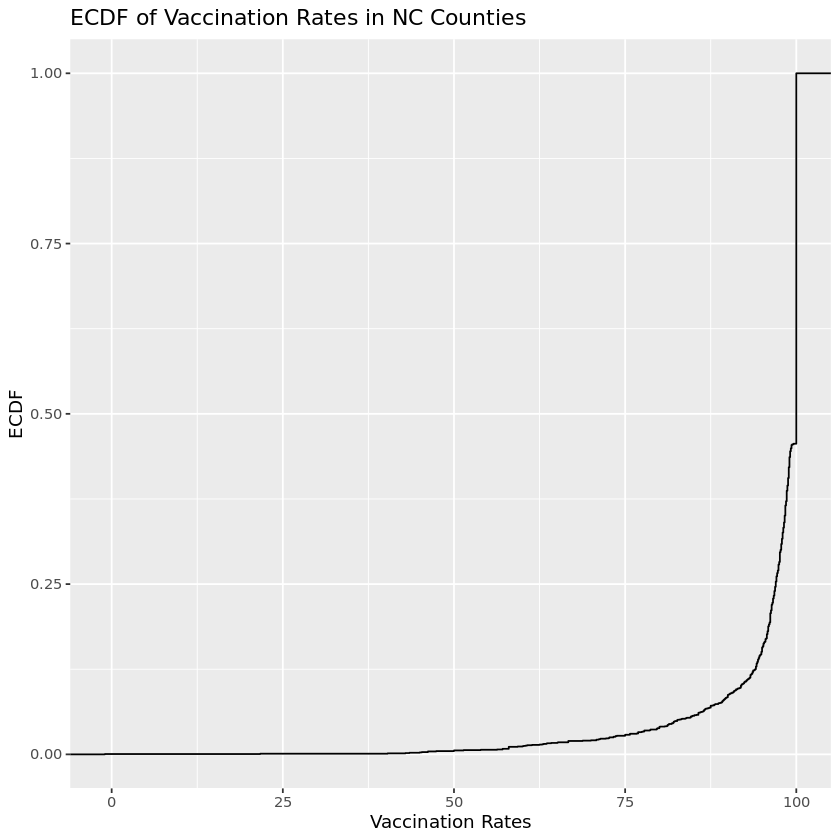

In [5]:
nc_counties <- datvar[datvar$state == 'North Carolina', ]
ggplot(nc_counties, aes(x = overall)) +
  stat_ecdf(geom = "step") +
  labs(title = "ECDF of Vaccination Rates in NC Counties", x = "Vaccination Rates", y = "ECDF")

(My solution is below if you want to peek üëÄ. Uncomment the code, change the cell to `markdown`, and exectute it.)

![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?